In [1]:
import pandas as pd
import warnings
import seaborn as sns
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
import re
from nltk.stem import WordNetLemmatizer

# World Mental Health Twitter Sentiment Analysis

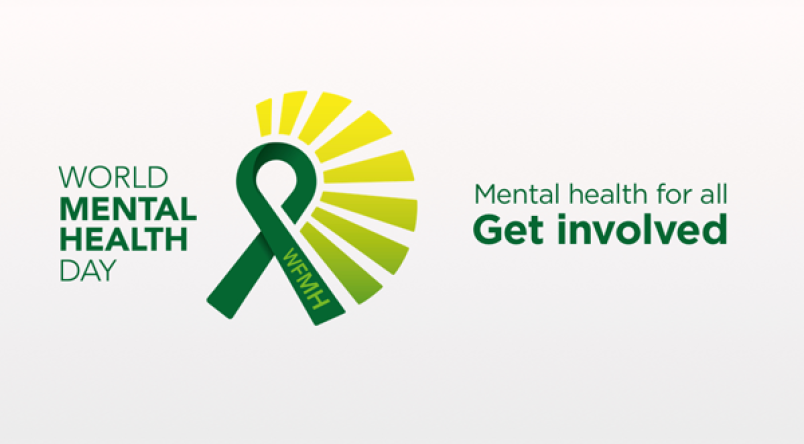

In [3]:
from IPython.display import Image
Image(filename='world-mental-health-day.png')

In [7]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [3]:
mental_health = pd.read_csv('world_mental_health_day.csv')

In [4]:
mental_health.drop(['COMMENTS','LIKES'], axis=1,inplace=True)

In [5]:
mental_health.columns = ['Tweets', 'Retweets']

In [6]:
mental_health.isnull().sum()

Tweets        0
Retweets    148
dtype: int64

In [7]:
mental_health.fillna(0, inplace=True)

In [8]:
mental_health.isnull().sum()

Tweets      0
Retweets    0
dtype: int64

In [9]:
mental_health["word_count"] = mental_health["Tweets"].apply(lambda tweet: len(tweet.split()))

In [10]:
wmh = pd.read_csv('WMHDayTweets.csv')

In [11]:
wmh.drop('Hashtags', axis=1,inplace=True)

In [12]:
mental_health.head()

,Tweets,Retweets,word_count
0,Tomorrow is #WorldMentalHeathDay I am reminde...,14,42
1,Free tickets to the Inc. 5000 Vision Conferenc...,2,18
2,. @DrDavidTranter Discusses the importance of...,6,25
3,"To quote @DrSue22 ""feeling positive socially...",4,42
4,I learned this over again this weekend in a mo...,0,24


In [13]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [14]:
senti_analyzer = SentimentIntensityAnalyzer()

In [15]:
compound_score = []

for sen in mental_health['Tweets']:
    
    compound_score.append(senti_analyzer.polarity_scores(sen)['compound'])

In [16]:
mental_health['Compound Score'] = compound_score

In [17]:
Sentiment = []

for i in compound_score:
    
    if i >= 0.05:
        
        Sentiment.append('Positive')
        
    elif i > -0.05 and i < 0.05:
        
        Sentiment.append('Neutral')
        
    else:
        
        Sentiment.append('Negative')
        

In [18]:
mental_health['Sentiment'] = Sentiment

In [19]:
mental_health.head()

,Tweets,Retweets,word_count,Compound Score,Sentiment
0,Tomorrow is #WorldMentalHeathDay I am reminde...,14,42,-0.8534,Negative
1,Free tickets to the Inc. 5000 Vision Conferenc...,2,18,0.8172,Positive
2,. @DrDavidTranter Discusses the importance of...,6,25,0.9042,Positive
3,"To quote @DrSue22 ""feeling positive socially...",4,42,0.8750,Positive
4,I learned this over again this weekend in a mo...,0,24,-0.6377,Negative


In [20]:
wmh.head()

,Tweets,Retweets,word_count,Compound Score,Sentiment
0,"By paying attention to those around you, it mi...",705,14,0.4939,Positive
1,"green ribbons, talking about mental health awa...",26,14,0.5399,Positive
2,@CBSThisMorning #WorldMentalHealthDay every Oc...,0,17,0.4199,Positive
3,"RT @cspyyc: In the US, approximately 70% of pa...",56,24,-0.6908,Negative
4,RT @INFJMinefield: Could one friend please cop...,80,20,0.6705,Positive


In [21]:
mental_health.isnull().sum()

Tweets            0
Retweets          0
word_count        0
Compound Score    0
Sentiment         0
dtype: int64

In [22]:
mental_health_data = pd.concat([mental_health, wmh])

# Tweets Dataset

In [23]:
mental_health_data.head()

,Tweets,Retweets,word_count,Compound Score,Sentiment
0,Tomorrow is #WorldMentalHeathDay I am reminde...,14,42,-0.8534,Negative
1,Free tickets to the Inc. 5000 Vision Conferenc...,2,18,0.8172,Positive
2,. @DrDavidTranter Discusses the importance of...,6,25,0.9042,Positive
3,"To quote @DrSue22 ""feeling positive socially...",4,42,0.8750,Positive
4,I learned this over again this weekend in a mo...,0,24,-0.6377,Negative


In [24]:
mental_health_data.shape

(665, 5)

In [25]:
mental_health_data.isnull().sum()

Tweets            0
Retweets          0
word_count        0
Compound Score    0
Sentiment         0
dtype: int64

In [26]:
dfs = mental_health_data

# Tweets Word Count Distribution

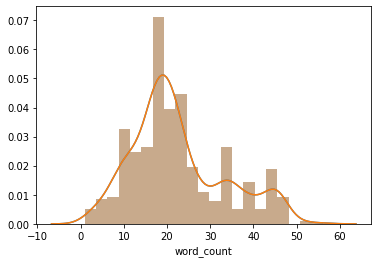

In [27]:
# Word Count Distribution Histogram
sns_plot = sns.distplot(dfs['word_count'])
fig = sns_plot.get_figure()
fig.savefig("wmh_word_count.png")
sns.distplot(dfs['word_count'])

In [28]:
pos_count = sum(dfs['Sentiment']=='Positive')
neg_count = sum(dfs['Sentiment']=='Negative')
neu_count = sum(dfs['Sentiment']=='Neutral')

# Sentiment Distribution of the Tweets

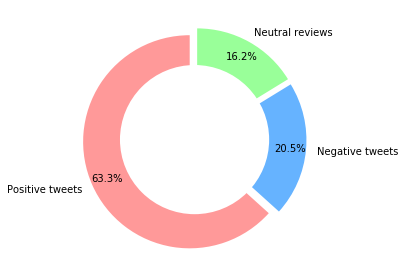

In [29]:
# Sentiment Distribution

pos_count = sum(dfs['Sentiment']=='Positive')
neg_count = sum(dfs['Sentiment']=='Negative')
neu_count = sum(dfs['Sentiment']=='Neutral')

import matplotlib.pyplot as plt
# Pie chart
labels = ['Positive tweets', 'Negative tweets', 'Neutral reviews']
sizes = [pos_count, neg_count, neu_count]
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
#explsion
explode = (0.05,0.05,0.05)
 
    
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.savefig('wmh_sentiment_distribution.png')

plt.show()

# Most Positive Tweet

In [30]:
# Most Positive Tweet

pos_max = dfs.loc[dfs['Compound Score']==max(dfs['Compound Score'])]
pos_max

,Tweets,Retweets,word_count,Compound Score,Sentiment
122,Mental Health is important. Acknowledge it. Ac...,0,34,0.9666,Positive


# Most Negative Tweet

In [31]:
# Most Negative Tweet

neg_max = dfs.loc[dfs['Compound Score']==min(dfs['Compound Score'])]
neg_max

,Tweets,Retweets,word_count,Compound Score,Sentiment
48,RT @cspyyc: People who attempt and die by suic...,233,28,-0.943,Negative


# Positive Tweets

In [32]:
# Positive Tweets

gp = dfs.groupby(by=['Sentiment'])
positive_tweets = gp.get_group('Positive')
positive_tweets.head()

,Tweets,Retweets,word_count,Compound Score,Sentiment
1,Free tickets to the Inc. 5000 Vision Conferenc...,2,18,0.8172,Positive
2,. @DrDavidTranter Discusses the importance of...,6,25,0.9042,Positive
3,"To quote @DrSue22 ""feeling positive socially...",4,42,0.8750,Positive
5,Here's a helpful list of organisations that of...,0,20,0.6705,Positive
6,Photo fun in 6A for #WorldMentalHeathDay @Br...,0,9,0.5106,Positive


In [33]:
positive_tweets.shape

(421, 5)

# Negative Tweets

In [34]:
# Negative Tweets

negative_tweets = gp.get_group('Negative')
negative_tweets.head()

,Tweets,Retweets,word_count,Compound Score,Sentiment
0,Tomorrow is #WorldMentalHeathDay I am reminde...,14,42,-0.8534,Negative
4,I learned this over again this weekend in a mo...,0,24,-0.6377,Negative
19,#WorldMentalHeathDay Reminder: always check in...,49,52,-0.1280,Negative
20,We know music has a great impact on mental hea...,0,42,-0.3818,Negative
34,I have Schizophrenia with hallucinations and i...,0,48,-0.5719,Negative


In [35]:
negative_tweets.shape

(136, 5)

# Neutral Tweets

In [36]:
# Neutral Tweets

neutral_tweets = gp.get_group('Neutral')
neutral_tweets.head()

,Tweets,Retweets,word_count,Compound Score,Sentiment
7,#WorldMentalHeathDay may have passed but menta...,9,17,0.0,Neutral
17,Tomorrow is #WorldMentalHeathDay and the @WHO...,0,45,0.0,Neutral
23,WHO's event for #WorldMentalHeathDay FB https...,22,17,0.0,Neutral
35,WHO's event for #WorldMentalHeathDay FB https...,13,17,0.0,Neutral
43,World Mental Health Day! “Mental health…is no...,1,29,0.0,Neutral


In [37]:
neutral_tweets.shape

(108, 5)

# Wordcloud Function

In [38]:
# Wordcloud Function

def plot_Cloud(wordCloud):
    plt.figure( figsize=(20,10), facecolor='w')
    plt.imshow(wordCloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

In [39]:
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['worldmentalhealthday','worldmentalheathday']
stopwords.extend(newStopWords)

In [40]:
def wordcloud(data):
    
    words_corpus = ''
    words_list = []

    
    for rev in data["Tweets"]:
        
        text = str(rev).lower()
        text = text.replace('rt', ' ') 
        
        
        text = re.sub(r"http\S+", "", text)        
        text = re.sub(r'[^\w\s]','',text)
        text = ''.join([i for i in text if not i.isdigit()])
        
        tokens = nltk.word_tokenize(text)
        tokens = [word for word in tokens if word not in stopwords]
        
        for word in tokens[:]: 
            if word.startswith('@'): 
                tokens.remove(word) 
        # Remove aplha numeric characters
        
        for words in tokens:
            
            words_corpus = words_corpus + words + " "
            words_list.append(words)
            
    return words_corpus, words_list

In [43]:
import cv2
import numpy as np
image1 = cv2.imread('mask1.png')
mask = np.array(image1)

# WordCloud - Positive Tweets

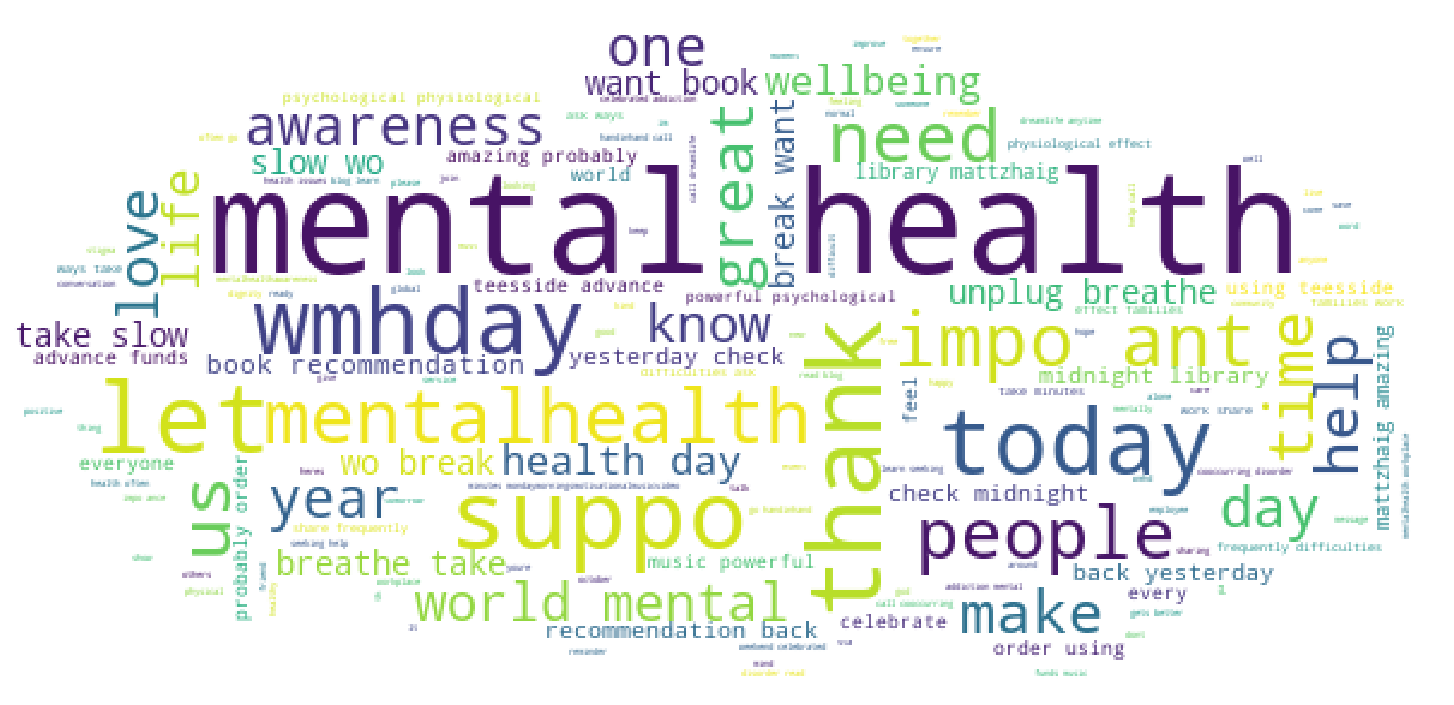

In [44]:
# WordCloud - Positive Tweets

from wordcloud import WordCloud
positive_wordcloud = WordCloud(background_color= "white",mask=mask,width=900, height=500).generate(wordcloud(positive_tweets)[0])
    
plot_Cloud(positive_wordcloud)
positive_wordcloud.to_file('wmh_positive_tweets_wc.png')


# WordCloud - Negative Tweets

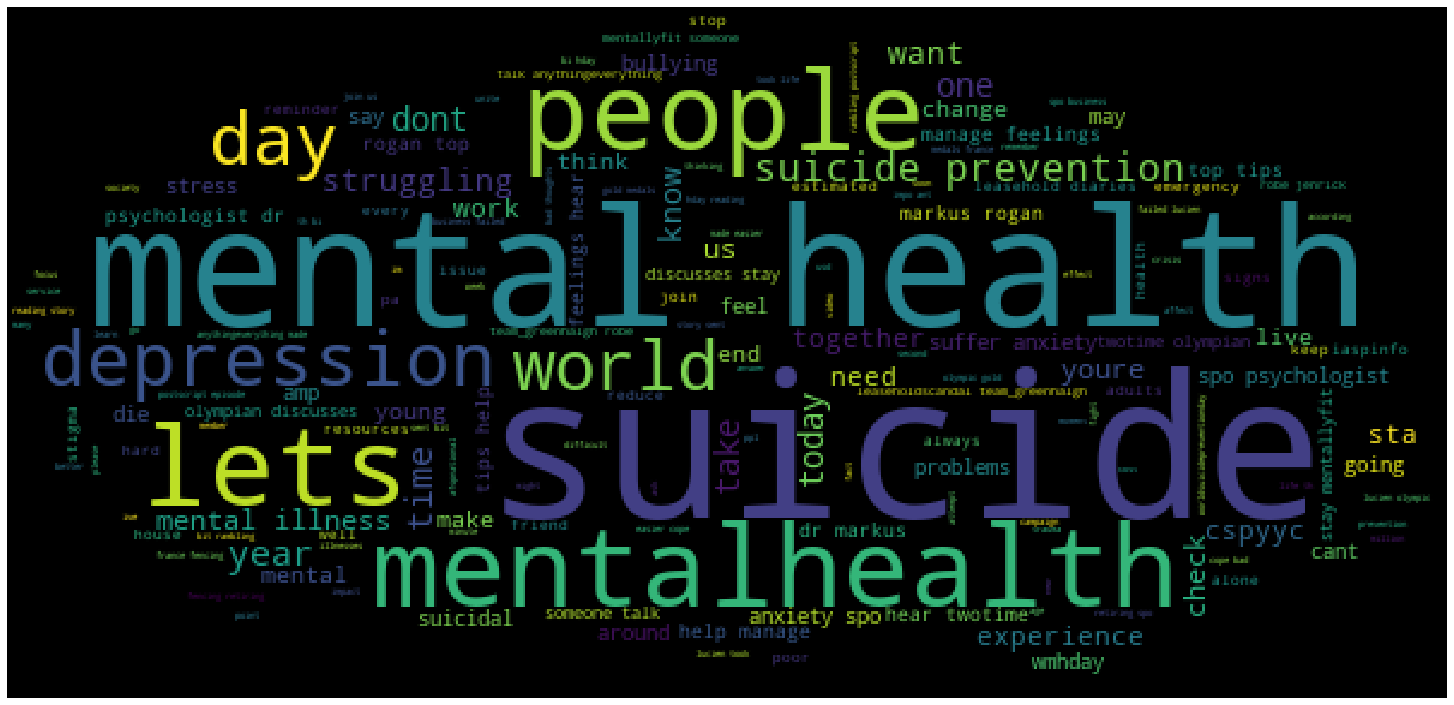

In [45]:
# WordCloud - Negative Tweets

negative_wordcloud = WordCloud(mask=mask,width=900, height=500).generate(wordcloud(negative_tweets)[0])

plot_Cloud(negative_wordcloud)
negative_wordcloud.to_file('wmh_negative_tweets_wc.png')


# WordCloud - Neutral Tweets

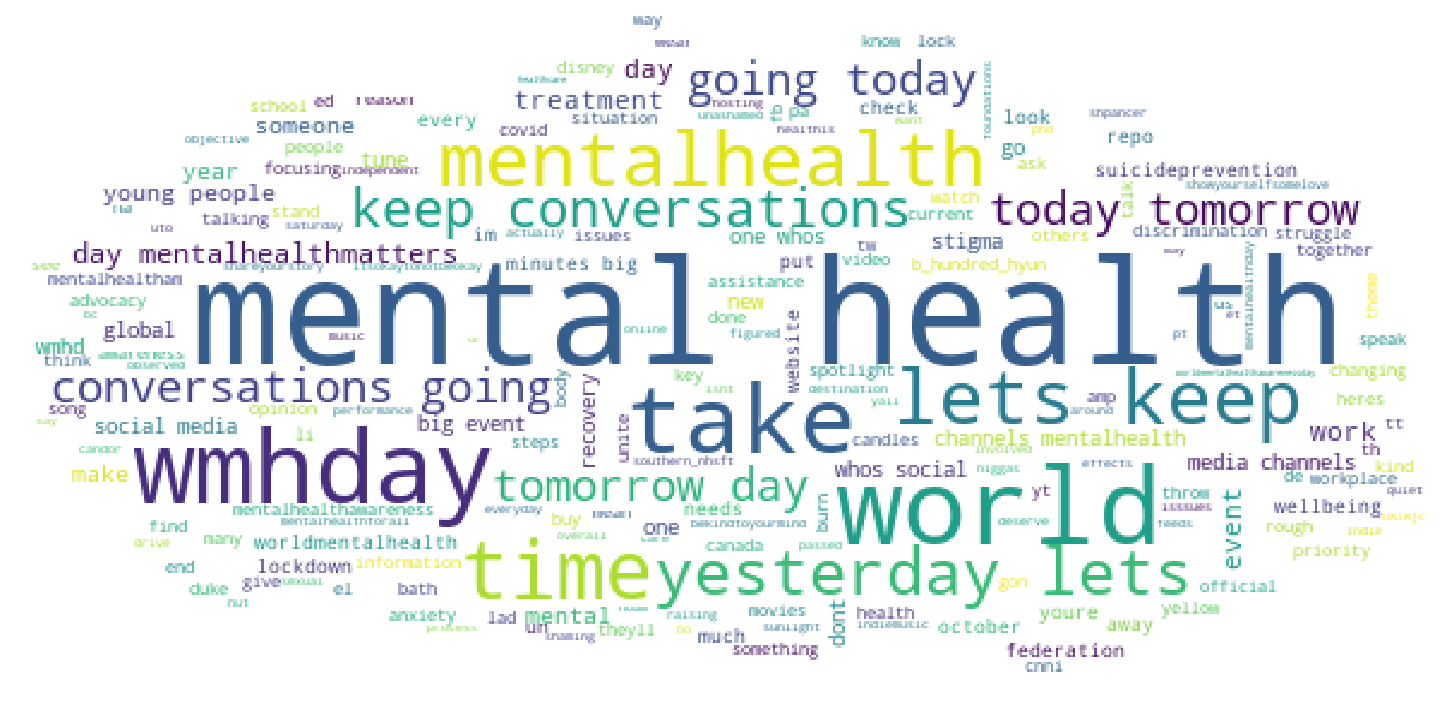

In [46]:
# WordCloud - Neutral Tweets

neutral_wordcloud = WordCloud(background_color= "white",mask=mask,width=900, height=500).generate(wordcloud(neutral_tweets)[0])

plot_Cloud(neutral_wordcloud)
neutral_wordcloud.to_file('wmh_neutral_tweets_wc.png')


# Wordcloud - All Tweets

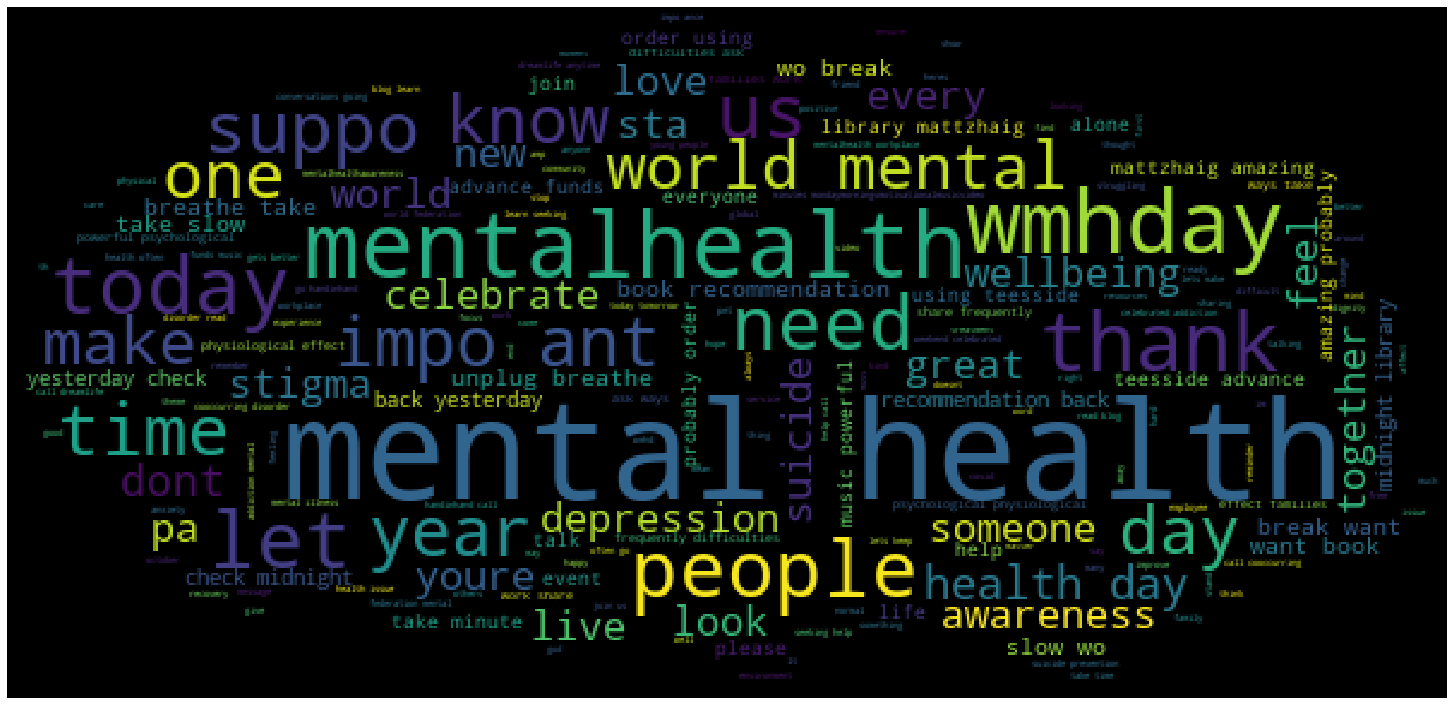

In [47]:
# Wordcloud - All Tweets

total_wordcloud = WordCloud(mask=mask, width=900, height=500).generate(wordcloud(dfs)[0])

plot_Cloud(total_wordcloud)
total_wordcloud.to_file('wmh_total_tweets_wc.png')


# Most Frequent Words - Total Tweets

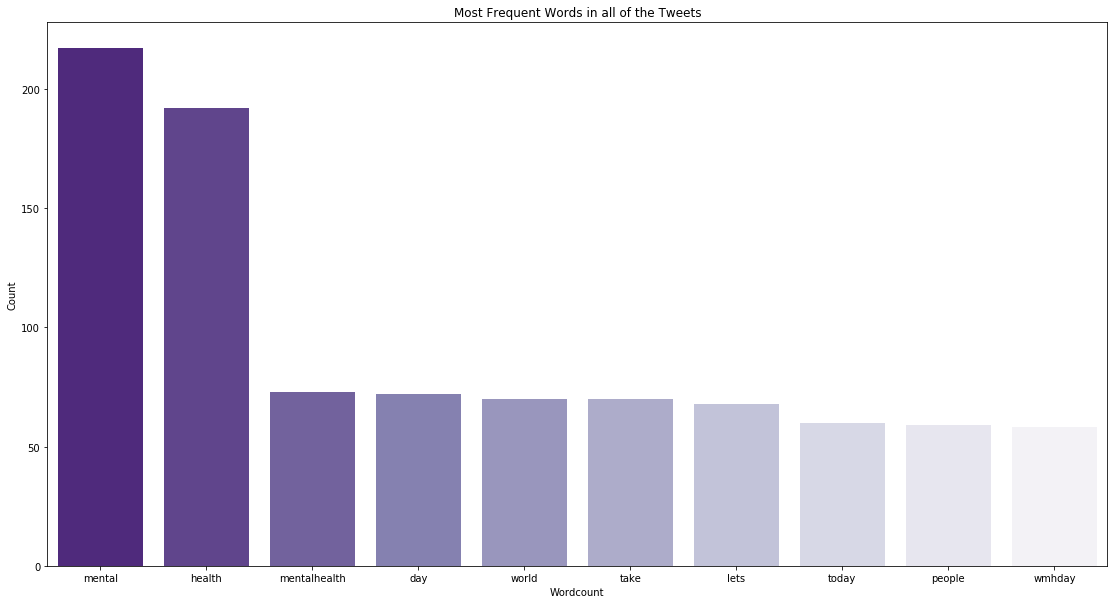

In [48]:
# Most Frequent Words - Total Tweets

aa = nltk.FreqDist(wordcloud(dfs)[1])
dd = pd.DataFrame({'Wordcount': list(aa.keys()),
                  'Count': list(aa.values())})
# selecting top 10 most frequent hashtags     
dd = dd.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(19,10))
plt.title('Most Frequent Words in all of the Tweets')
ax = sns.barplot(data=dd,palette="Purples_r", x= "Wordcount", y = "Count")
ax.set(ylabel = 'Count')
fig = ax.get_figure()
fig.savefig("wmh_total_tweets_wf.png")
plt.show()

# Most Frequent Words - Positive Tweets

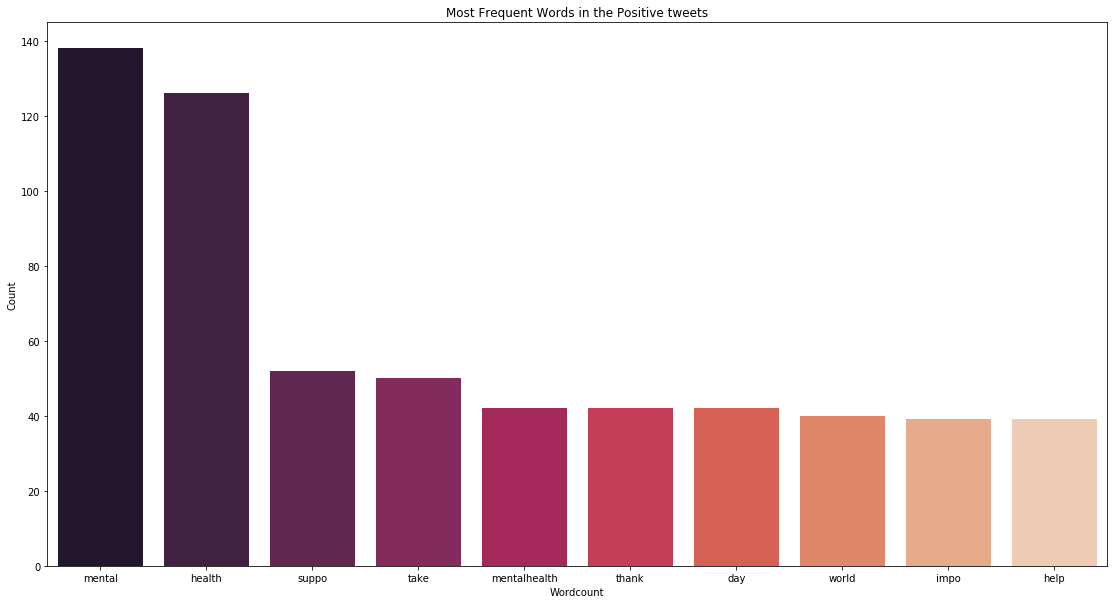

In [49]:
# Most Frequent Words - Positive Tweets

ap = nltk.FreqDist(wordcloud(positive_tweets)[1])
dp = pd.DataFrame({'Wordcount': list(ap.keys()),
                  'Count': list(ap.values())})
# selecting top 10 most frequent hashtags     
dp = dp.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(19,10))
plt.title('Most Frequent Words in the Positive tweets')
ax = sns.barplot(data=dp,palette="rocket", x= "Wordcount", y = "Count")
ax.set(ylabel = 'Count')
fig = ax.get_figure()
fig.savefig("wmh_positive_tweets_wf.png")
plt.show()

# Most Frequent Words - Negative Tweets

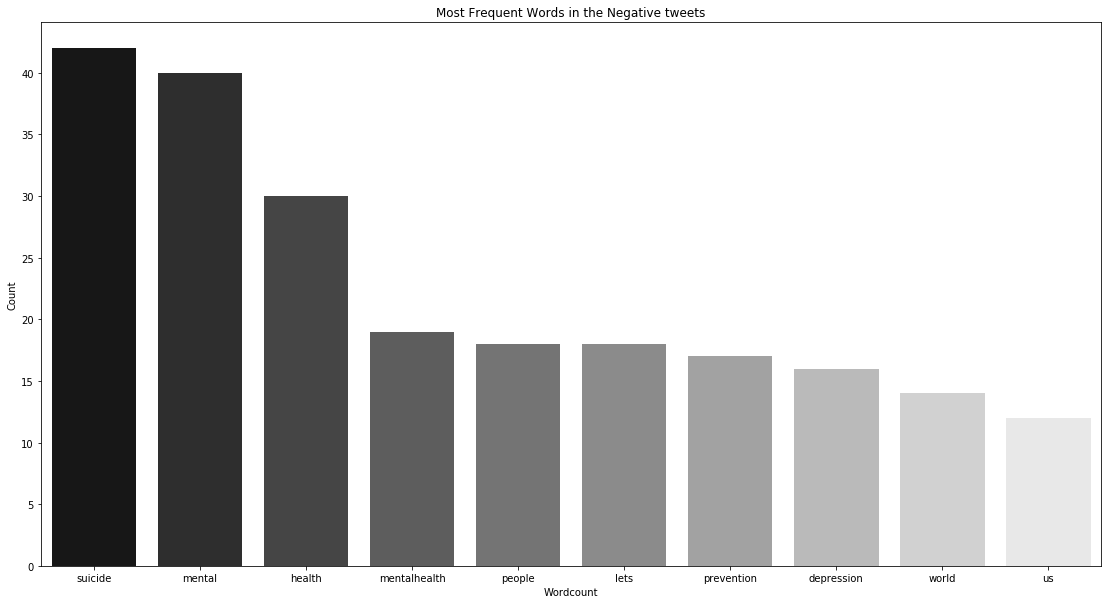

In [50]:
# Most Frequent Words - Negative Tweets

an = nltk.FreqDist(wordcloud(negative_tweets)[1])
dn = pd.DataFrame({'Wordcount': list(an.keys()),
                  'Count': list(an.values())})
# selecting top 10 most frequent hashtags     
dn = dn.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(19,10))
plt.title('Most Frequent Words in the Negative tweets')
ax = sns.barplot(data=dn,palette="gray", x= "Wordcount", y = "Count")
ax.set(ylabel = 'Count')
fig = ax.get_figure()
fig.savefig("wmh_negative_tweets_wf.png")
plt.show()

# Most Frequent Words - Neutral Tweets

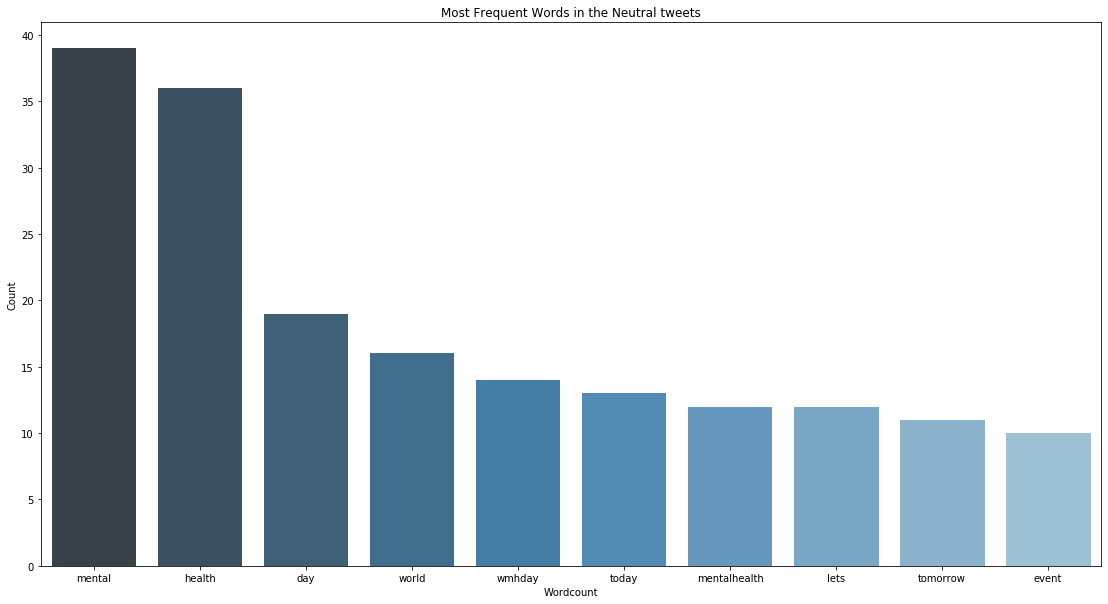

In [51]:
# Most Frequent Words - Neutral Tweets

au = nltk.FreqDist(wordcloud(neutral_tweets)[1])
du = pd.DataFrame({'Wordcount': list(au.keys()),
                  'Count': list(au.values())})
# selecting top 10 most frequent hashtags     
du = du.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(19,10))
plt.title('Most Frequent Words in the Neutral tweets')
ax = sns.barplot(data=du, palette= "Blues_d",x= "Wordcount", y = "Count")
ax.set(ylabel = 'Count')
fig = ax.get_figure()
fig.savefig("wmh_neutral_tweets_wf.png")
plt.show()